# Time Series Forescasting

In [22]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]

In [17]:
def parser(x):
    return datetime.strptime(x,format="%Y-%m-%dT%H:%M:%S")
data = pd.read_excel('energtes.xlsx', skiprows =15, index_col=0, parse_dates=[0])
#sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)parse_dates=[0] ,date_parser=parser

In [19]:
data.head()

,Corrected Wind speed @ 79m,Operating velocity,Power / kW,Energy /kWh
Date,,,,
2015-02-23 00:00:00,5.961927,5.961927,392.284111,65.380685
2015-02-23 00:10:00,6.101075,6.101075,420.397088,70.066181
2015-02-23 00:20:00,6.518517,6.518517,512.727971,85.454662
2015-02-23 00:30:00,5.887002,5.887002,377.679316,62.946553
2015-02-23 00:40:00,5.822780,5.822780,365.453252,60.908875


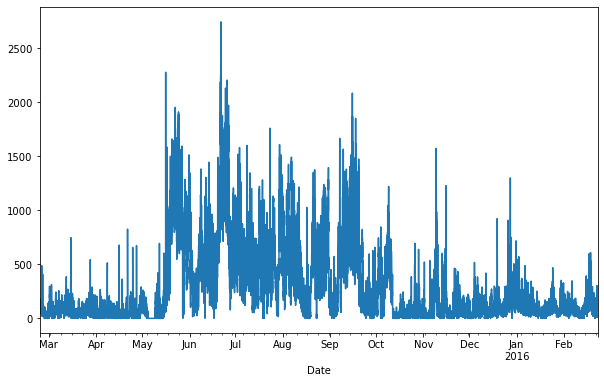

In [23]:
data['Energy /kWh'].plot()

Stationary means mean, variance and covariance is constant over periods.

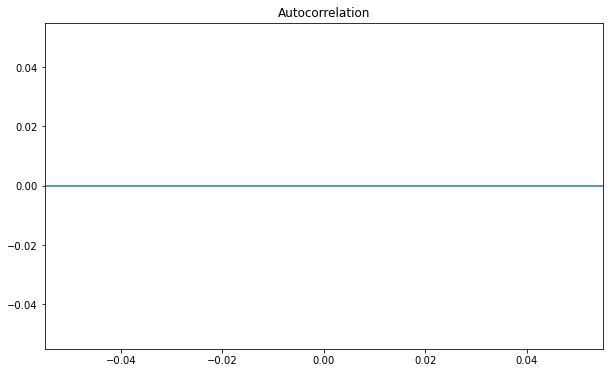

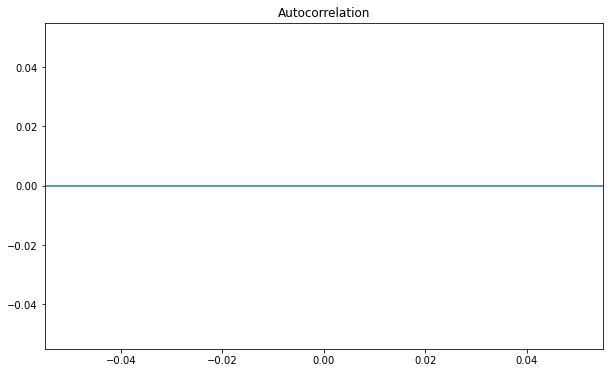

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Energy /kWh'])

In [25]:
data['Energy /kWh'].shift(1)

Date
2015-02-23 00:00:00          NaN
2015-02-23 00:10:00    65.380685
2015-02-23 00:20:00    70.066181
2015-02-23 00:30:00    85.454662
2015-02-23 00:40:00    62.946553
                         ...    
2016-02-22 23:10:00    10.164227
2016-02-22 23:20:00          NaN
2016-02-22 23:30:00     8.529808
2016-02-22 23:40:00          NaN
2016-02-22 23:50:00     9.419599
Name: Energy /kWh, Length: 52560, dtype: float64

In [26]:
data_diff = data['Energy /kWh'].diff(periods=1)

In [27]:
data_diff = data_diff[1:]
data_diff.head()

Date
2015-02-23 00:10:00     4.685496
2015-02-23 00:20:00    15.388480
2015-02-23 00:30:00   -22.508109
2015-02-23 00:40:00    -2.037677
2015-02-23 00:50:00   -22.251824
Name: Energy /kWh, dtype: float64

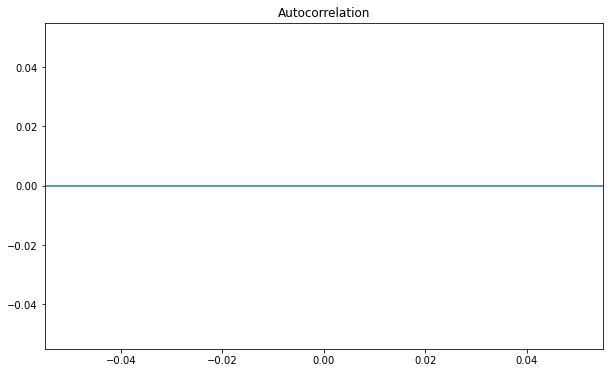

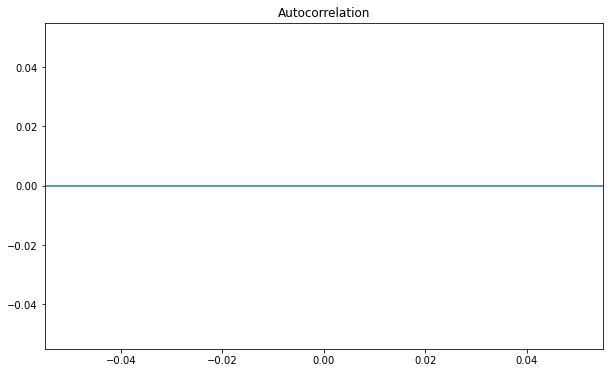

In [28]:
plot_acf(data_diff)

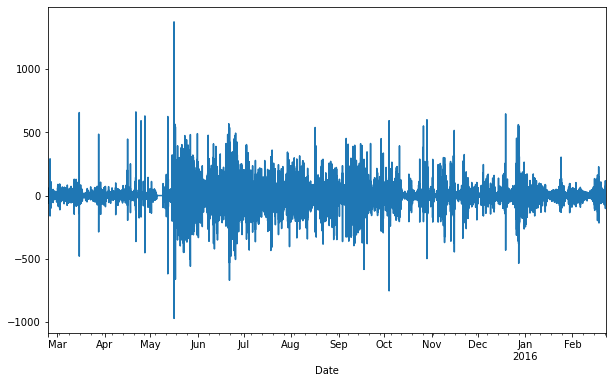

In [29]:
data_diff.plot()

In [35]:
X = data['Energy /kWh'].values
X.size
train = X[0:42000] 
test = X[42000:] 
predictions = []

In [34]:
train.size
test.size

10560

# Autoreggresive AR Model

In [40]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [45]:
predictions = model_ar_fit.predict(start=39999,end=52559)

In [51]:
#AR model

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

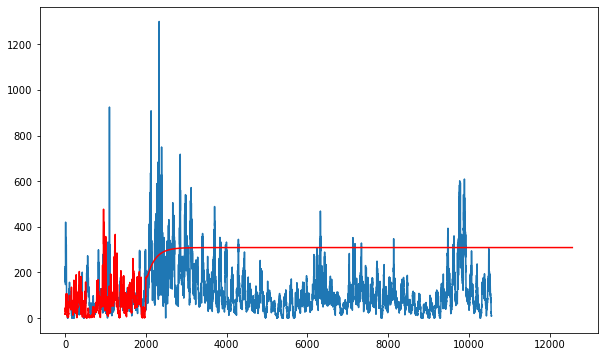

In [46]:
plt.plot(test)
plt.plot(predictions,color='red')

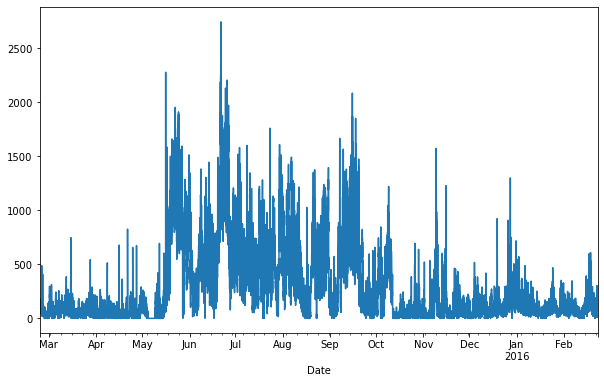

In [47]:
data['Energy /kWh'].plot()

# ARIMA model

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:

model_arima = ARIMA(train,order=(0, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

466662.40779115225


In [63]:
predictions= model_arima_fit.forecast(steps=10000)[0]


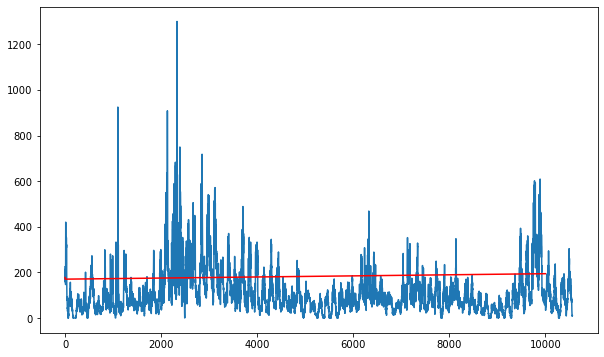

In [53]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
mean_squared_error(test,predictions)

In [59]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [60]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 615987.6118922353
(0, 0, 1) 568755.2567358768
(0, 0, 2) 539457.5403014716
(0, 0, 3) 521453.72349479055
(0, 0, 4) 509316.5199192768
(0, 1, 0) 469197.15527079534
(0, 1, 1) 466986.80525945406
(0, 1, 2) 466662.40779115225
(0, 1, 3) 466627.5847455254
(0, 1, 4) 466600.39425247523
(0, 2, 0) 506047.4708201579
(0, 2, 1) 469200.379964042
(0, 2, 2) 466990.24918712885
(0, 2, 3) 466666.7129489456
(0, 2, 4) 466632.27538266394
(1, 0, 0) 468893.1417017176
(1, 0, 1) 466832.173921522
(1, 0, 2) 466539.9430438626
(1, 0, 3) 466513.2240597389
(1, 0, 4) 466492.70605006
(1, 1, 0) 467438.0185529598
(1, 1, 1) 466606.2616743215
(1, 1, 2) 466606.02731520485
(1, 1, 3) 466604.7685741683
(1, 1, 4) 466602.00648161257
(1, 2, 0) 490534.03933247796
(2, 0, 0) 467240.47673275264
(2, 0, 1) 466497.6812930124
(2, 0, 2) 466499.1259439691
(2, 0, 3) 466500.12120030826
(2, 0, 4) 466494.6948950954
(2, 1, 0) 466888.03209654836
(2, 1, 1) 466606.2279666831
(2, 1, 2) 466358.95932512195
(2, 1, 3) 466604.7644806504
(2, 1, 4) 